In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
x = data[['alcohol']].values
y = data['quality'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
pr = LinearRegression()
pr.fit(x_poly_train, y_train)




LinearRegression()

In [16]:
y_pred_lin = lr.predict(x_test)
y_pred_poly = pr.predict(x_poly_test)

In [19]:
print('LR Metrics:')
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print('MSE:',mse_lin)
print('RMSE:',rmse_lin)
print('Rsquared:',r2_lin)

LR Metrics:
MSE: 0.730644234019256
RMSE: 0.8547773008329457
Rsquared: 0.1710201454832173


In [20]:
print('PR Metrics:')
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print('MSE:',mse_poly)
print('RMSE:',rmse_poly)
print('Rsquared:',r2_poly)

PR Metrics:
MSE: 0.7321933575255221
RMSE: 0.8556829772325274
Rsquared: 0.16926252923298202


<AxesSubplot:>

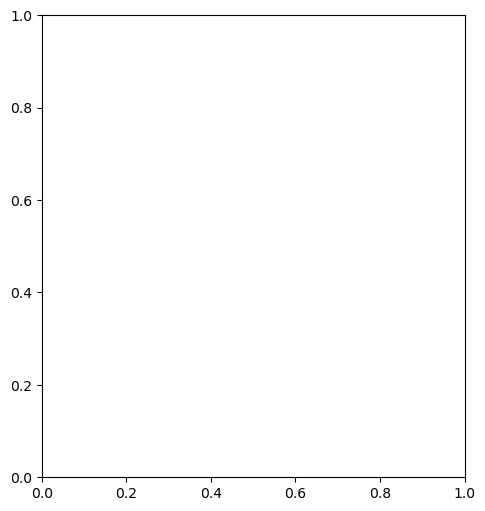

In [23]:
train_sizes, train_scores_lin, test_scores_lin = learning_curve(lr, x, y, cv=5)
train_sizes, train_scores_poly, test_scores_poly = learning_curve(pr,
x_poly_train, y_train, cv=5)
train_mean_lin = np. mean (train_scores_lin, axis=1)
train_std_lin = np.std(train_scores_lin, axis=1)
test_mean_lin = np.mean(test_scores_lin, axis=1)
test_std_lin = np.std(test_scores_lin, axis=1)
train_mean_poly = np. mean(train_scores_poly, axis=1)
train_std_poly = np.std(train_scores_poly, axis=1)
test_mean_poly = np.mean (test_scores_poly, axis=1)
test_std_poly = np.std(test_scores_poly, axis=1)

plt.figure(figsize=(12,6))
plt.subplot (1,2,1)